In [421]:
# imports liberaries
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import json 
import nltk
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob 
from nltk.stem import WordNetLemmatizer

from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate

from IPython import display 
display.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')

In [422]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [423]:
#load the dataset
data = pd.read_csv("/content/gdrive/MyDrive/Reviews.csv")
data.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [424]:
#check the shape
data.shape

(568454, 10)

In [425]:
data = data[1:5000]

In [426]:
data = data[['Score','Text']]
data.head(20)

,Score,Text
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
5,4,I got a wild hair for taffy and ordered this f...
6,5,This saltwater taffy had great flavors and was...
7,5,This taffy is so good. It is very soft and ch...
8,5,Right now I'm mostly just sprouting this so my...
9,5,This is a very healthy dog food. Good for thei...
10,5,I don't know if it's the cactus or the tequila...


In [427]:
# check whether it's having null values or not
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Score   Text
1     False  False
2     False  False
3     False  False
4     False  False
5     False  False
...     ...    ...
4995  False  False
4996  False  False
4997  False  False
4998  False  False
4999  False  False

[4999 rows x 2 columns]>

In [428]:
# check unique categories
data['Score'].value_counts()

5    3133
4     712
1     469
3     395
2     290
Name: Score, dtype: int64

In [429]:
# if rating is above 3 we will consider it as 1 else as 0.
data['Score'] = data['Score'].apply(lambda x: 1 if x > 3 else 0) # positive as 1 and negative as 0

In [430]:
data.head(20)

,Score,Text
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...
5,1,I got a wild hair for taffy and ordered this f...
6,1,This saltwater taffy had great flavors and was...
7,1,This taffy is so good. It is very soft and ch...
8,1,Right now I'm mostly just sprouting this so my...
9,1,This is a very healthy dog food. Good for thei...
10,1,I don't know if it's the cactus or the tequila...


#### visualiza words using WordCloud

In [431]:
data['Score'].value_counts()

1    3845
0    1154
Name: Score, dtype: int64

In [432]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# get the text based on scores!
score_zero = data['Text'][data['Score'] == 0]
score_one = data['Text'][data['Score'] == 1]

#word tokenize the data(convert to string)
def list_tokenizer(Score):
    Scores = " ".join(Score)
    Scores = nltk.word_tokenize(Scores)
    return str(Scores)

# visulizer
def word_cloud(Score, number):
    wc = WordCloud(background_color= 'pink', max_font_size= 45, max_words= 10)
    wc.generate(Score)
    plt.imshow(wc, interpolation= 'bilinear')
    plt.title(f'WorldCloud for {number}')
    plt.axis('off')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


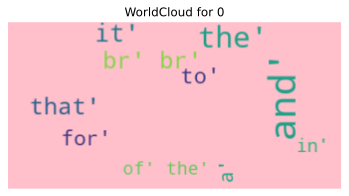

In [433]:
# Let's visualizing the Scores
nltk.download('punkt')
word_cloud(list_tokenizer(score_zero), 0)

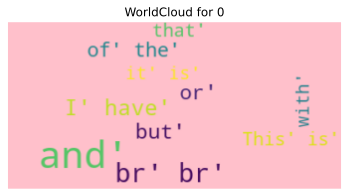

In [434]:
word_cloud(list_tokenizer(score_one), 0)

#### Text Preprocessing

In [435]:
# 1. lowering words
data['Text'] = data['Text'].str.lower()
data.head()

,Score,Text
1,0,product arrived labeled as jumbo salted peanut...
2,1,this is a confection that has been around a fe...
3,0,if you are looking for the secret ingredient i...
4,1,great taffy at a great price. there was a wid...
5,1,i got a wild hair for taffy and ordered this f...


In [436]:
# 2. remove punctuation!
data['Text'] = data['Text'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))
data.head(20)

,Score,Text
1,0,product arrived labeled as jumbo salted peanut...
2,1,this is a confection that has been around a fe...
3,0,if you are looking for the secret ingredient i...
4,1,great taffy at a great price there was a wide...
5,1,i got a wild hair for taffy and ordered this f...
6,1,this saltwater taffy had great flavors and was...
7,1,this taffy is so good it is very soft and che...
8,1,right now im mostly just sprouting this so my ...
9,1,this is a very healthy dog food good for their...
10,1,i dont know if its the cactus or the tequila o...


In [437]:
#3. remove stopwords
from spacy.lang.en.stop_words import STOP_WORDS
data['Text'] = data['Text'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]))
data.head(20)

,Score,Text
1,0,product arrived labeled jumbo salted peanutsth...
2,1,confection centuries light pillowy citrus gela...
3,0,looking secret ingredient robitussin believe f...
4,1,great taffy great price wide assortment yummy ...
5,1,got wild hair taffy ordered pound bag taffy en...
6,1,saltwater taffy great flavors soft chewy candy...
7,1,taffy good soft chewy flavors amazing definite...
8,1,right im sprouting cats eat grass love rotate ...
9,1,healthy dog food good digestion good small pup...
10,1,dont know cactus tequila unique combination in...


In [438]:
#4. remove url and tags! 
data['Text'] = data['Text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
data.head(20)

,Score,Text
1,0,product arrived labeled jumbo salted peanutsth...
2,1,confection centuries light pillowy citrus gela...
3,0,looking secret ingredient robitussin believe f...
4,1,great taffy great price wide assortment yummy ...
5,1,got wild hair taffy ordered pound bag taffy en...
6,1,saltwater taffy great flavors soft chewy candy...
7,1,taffy good soft chewy flavors amazing definite...
8,1,right im sprouting cats eat grass love rotate ...
9,1,healthy dog food good digestion good small pup...
10,1,dont know cactus tequila unique combination in...


In [439]:
# 5. remove html tags! 
data['Text'] = data['Text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

data.head(20)

,Score,Text
1,0,product arrived labeled jumbo salted peanutsth...
2,1,confection centuries light pillowy citrus gela...
3,0,looking secret ingredient robitussin believe f...
4,1,great taffy great price wide assortment yummy ...
5,1,got wild hair taffy ordered pound bag taffy en...
6,1,saltwater taffy great flavors soft chewy candy...
7,1,taffy good soft chewy flavors amazing definite...
8,1,right im sprouting cats eat grass love rotate ...
9,1,healthy dog food good digestion good small pup...
10,1,dont know cactus tequila unique combination in...


In [440]:
# 6. spelling correction 
#%time 
#data['Text'] = data['Text'].apply(lambda x: TextBlob(x).correct())

#data.head()

In [441]:
# 7. remove emails
data['Text'] = data['Text'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))
data.head(20)

,Score,Text
1,0,product arrived labeled jumbo salted peanutsth...
2,1,confection centuries light pillowy citrus gela...
3,0,looking secret ingredient robitussin believe f...
4,1,great taffy great price wide assortment yummy ...
5,1,got wild hair taffy ordered pound bag taffy en...
6,1,saltwater taffy great flavors soft chewy candy...
7,1,taffy good soft chewy flavors amazing definite...
8,1,right im sprouting cats eat grass love rotate ...
9,1,healthy dog food good digestion good small pup...
10,1,dont know cactus tequila unique combination in...


In [442]:
# 8. remove extra spaces
data['Text'] = data['Text'].apply(lambda x: " ".join(x.split()))
data.head(20)

,Score,Text
1,0,product arrived labeled jumbo salted peanutsth...
2,1,confection centuries light pillowy citrus gela...
3,0,looking secret ingredient robitussin believe f...
4,1,great taffy great price wide assortment yummy ...
5,1,got wild hair taffy ordered pound bag taffy en...
6,1,saltwater taffy great flavors soft chewy candy...
7,1,taffy good soft chewy flavors amazing definite...
8,1,right im sprouting cats eat grass love rotate ...
9,1,healthy dog food good digestion good small pup...
10,1,dont know cactus tequila unique combination in...


In [443]:
# 9. remove numbers
data['Text'] = data['Text'].str.replace('\d', '')
data.tail(20)

,Score,Text
4980,0,purchase banh trang spring rolls skin frequent...
4981,0,bought brand horrible amazon needs source offe...
4982,1,beautiful smooth spring roll wrappers package ...
4983,0,wrappers good easier filling fact wasnt meant ...
4984,1,im best cook like try new things diet healthie...
4985,1,regular customers delicious coffee purchase de...
4986,1,area find cinnamon mentos happy able find flav...
4987,1,product wifes favorite kids love suggest like ...
4988,1,good green tea bitterness orange discoloration...
4989,1,dynasty brand green tea best green tea ive tas...


In [444]:
# 11. Tokenization
#data["Text"] = data["Text"].apply(lambda x: TextBlob(x).words)

In [445]:
# 10. lemmatizer 
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
%time
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data['Text'] = data['Text'].apply(lambda text: lemmatize_words(text))
data.head(20)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs


,Score,Text
1,0,product arrived labeled jumbo salted peanutsth...
2,1,confection century light pillowy citrus gelati...
3,0,looking secret ingredient robitussin believe f...
4,1,great taffy great price wide assortment yummy ...
5,1,got wild hair taffy ordered pound bag taffy en...
6,1,saltwater taffy great flavor soft chewy candy ...
7,1,taffy good soft chewy flavor amazing definitel...
8,1,right im sprouting cat eat grass love rotate w...
9,1,healthy dog food good digestion good small pup...
10,1,dont know cactus tequila unique combination in...


In [446]:
# Term frequency
tf = data["Text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,product,1546.0
1,jumbo,3.0
2,arrived,145.0
3,labeled,8.0
4,salted,26.0


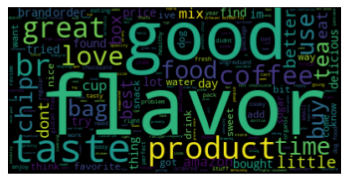

In [447]:
# Wordcloud
text = " ".join(i for i in data.Text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [448]:
data['Text']

1       product arrived labeled jumbo salted peanutsth...
2       confection century light pillowy citrus gelati...
3       looking secret ingredient robitussin believe f...
4       great taffy great price wide assortment yummy ...
5       got wild hair taffy ordered pound bag taffy en...
                              ...                        
4995    wanted like thesebr br cooky size half dollar ...
4996    impressed cooky tried came company flavor care...
4997    cooky came sealed high quality ingredient thin...
4998    taste good arent like best thing order prefere...
4999    love cooky paleo diet right cooky look forward...
Name: Text, Length: 4999, dtype: object

#### Convert text to numbers

In [449]:
# data split 
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(data['Text'], data['Score'], test_size = 0.3)

In [450]:
xtrain.shape
#xtest.shape

(3499,)

In [451]:
# method 1: Bag of words(BOW)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()


In [452]:
# method 2: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer  

tf_vectorizer = TfidfVectorizer()

# let's convert 
xtrain_tf = tf_vectorizer.fit_transform(xtrain).toarray()
xtest_tf = tf_vectorizer.transform(xtest).toarray()

#### model: Gaussina NB


In [453]:
from sklearn.naive_bayes import GaussianNB

#BOW
clf_bow = GaussianNB().fit(xtrain_bow, ytrain)  # fitting 
prediction_bow = clf_bow.predict(xtest_bow)  # predictions

#TF-IDF
clf_tf = GaussianNB().fit(xtrain_tf, ytrain)
prediction_tf = clf_tf.predict(xtest_tf)

#### Model evaluation

In [454]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

def metrics(prediction, actual): 
    print('Confusion_matrix \n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nclassification_report\n')
    print(classification_report(actual, prediction))
    
#BOW   
metrics(prediction_bow, ytest)

Confusion_matrix 
 [[181 183]
 [416 720]]

Accuracy: 0.6006666666666667

classification_report

              precision    recall  f1-score   support

           0       0.30      0.50      0.38       364
           1       0.80      0.63      0.71      1136

    accuracy                           0.60      1500
   macro avg       0.55      0.57      0.54      1500
weighted avg       0.68      0.60      0.63      1500



In [455]:
#TF-IDF
metrics(prediction_tf, ytest)

Confusion_matrix 
 [[177 187]
 [410 726]]

Accuracy: 0.602

classification_report

              precision    recall  f1-score   support

           0       0.30      0.49      0.37       364
           1       0.80      0.64      0.71      1136

    accuracy                           0.60      1500
   macro avg       0.55      0.56      0.54      1500
weighted avg       0.68      0.60      0.63      1500



#### RandomForest

##### BOW

In [456]:
rf_model = RandomForestClassifier().fit(xtrain_bow, ytrain)
cross_val_score(rf_model, xtrain_bow, ytrain, cv=5, n_jobs=-1).mean()

0.8076640098099326

In [457]:
rf_model = RandomForestClassifier().fit(xtest_bow, ytest)
cross_val_score(rf_model, xtest_bow, ytest, cv=5, n_jobs=-1).mean()

0.7819999999999999

#####TF-IDF

In [458]:
rf_model = RandomForestClassifier().fit(xtrain_tf, ytrain)
cross_val_score(rf_model, xtrain_tf, ytrain, cv=5, n_jobs=-1).mean()

0.8005162477007971

In [459]:
rf_model = RandomForestClassifier().fit(xtest_tf, ytest)
cross_val_score(rf_model, xtest_tf, ytest, cv=5, n_jobs=-1).mean()

0.7653333333333333